In [1]:
from functions.load_all_data import load_imgs_masks
from functions.sizes import compute_avg_size
from functions.composites import composite_masks
from functions.crop_image import random_crop
from functions.rescaling import rescale_img_comp
import matplotlib.pyplot as plt
import numpy as np
import time

# Purpose: Augment Images and Mask Composites for Regression Model
* Downscale images that are equal to a given bin to every bin below it 
    * only upscale to no more than 10 bins above it
* Generate more crops for larger bins with less examples
* Plot distribution of sizes after all these transformations
* ideally, sizes should be uniformly distributed

In [2]:
all_imgs, mask_colls = load_imgs_masks()[:2]

mask_comps = []
nuclei_sizes = []
for mask in mask_colls:
    curr_comp = composite_masks(mask)
    curr_size = compute_avg_size(curr_comp)
    
    mask_comps.append(curr_comp)
    nuclei_sizes.append(curr_size)

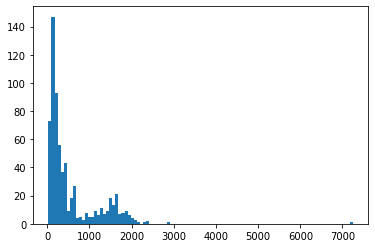

In [3]:
n, bins, patches = plt.hist(nuclei_sizes, bins=100)

In [4]:
sizes_comps_imgs = np.array((nuclei_sizes, mask_comps, all_imgs), order='F')
ind = sizes_comps_imgs[0, :].argsort(axis=0)
sizes_comps_imgs[0] = sizes_comps_imgs[0][ind]
sizes_comps_imgs[1] = sizes_comps_imgs[1][ind]
sizes_comps_imgs[2] = sizes_comps_imgs[2][ind]

In [5]:
(bins[1] - bins[0]) * 10

721.8071428571429

In [6]:
rescaled_sizes = []
rescaled_comps = []
rescaled_imgs = []

start = time.time()
for i in range(670):
    scaled_sizes = []
    scaled_comps = []
    scaled_imgs = []
    
    for j in range(len(n)):
        target_size = bins[j]
        curr_size = sizes_comps_imgs[0][i]
        
        if target_size >= sizes_comps_imgs[0][i]:
            if target_size > curr_size + 720.:
                break
                
        rescaled_img, rescaled_comp = rescale_img_comp(sizes_comps_imgs[2][i],
                                                      sizes_comps_imgs[1][i],
                                                      target_size)
        rescaled_size = compute_avg_size(rescaled_comp)
        
        scaled_sizes.append(rescaled_size)
        scaled_comps.append(rescaled_comp)
        scaled_imgs.append(rescaled_img)
        
    rescaled_sizes.append(scaled_sizes)
    rescaled_comps.append(scaled_comps)
    rescaled_imgs.append(scaled_imgs)
    
end = time.time() - start
print("Data rescaled in %d minutes, %.2f seconds" 
     %((end // 60), end % 60))

Data rescaled in 7 minutes, 54.57 seconds


674.875

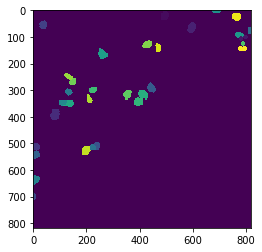

<Figure size 432x288 with 0 Axes>

In [7]:
plt.imshow(rescaled_comps[7][9]); plt.figure()
compute_avg_size(rescaled_comps[7][9])

In [8]:
unique = []
for i in range(669):
    if len(rescaled_sizes[i]) != len(rescaled_sizes[i+1]):
        unique.append(len(rescaled_sizes[i]))

In [9]:
unique

[10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 42,
 43,
 50]

In [34]:
def non_zero_crop(composite, image, size):
    try:
        cropped_img, cropped_mask = random_crop(img=image, 
                                                mask_composite=composite, crop_size=size)
        cropped_size = compute_avg_size(cropped_mask)
        if cropped_size == 0:
            return False
        return cropped_size, cropped_mask, cropped_img
    except ValueError:
        print(image.shape)
        return ["error", "error", "error"]
    

In [35]:
cropped_sizes = []
cropped_comps = []
cropped_imgs = []

start = time.time()
for i in range(670):
    curr_sizes = rescaled_sizes[i]
    curr_comps = rescaled_comps[i]
    curr_imgs = rescaled_imgs[i]
    
    size_list = []
    comp_list = []
    img_list = []
    
    for j in range(len(curr_sizes)):
        size = curr_sizes[j]
        comp = curr_comps[j]
        img = curr_imgs[j]
        
        while True:
            result = non_zero_crop(comp, img, 128)
            if result != False:
                break
        
        size_list.append(result[0])
        comp_list.append(result[1])
        img_list.append(result[2])
        
    cropped_sizes.append(size_list)
    cropped_comps.append(comp_list)
    cropped_imgs.append(img_list)

end = time.time() - start
print("Data cropped in %d minutes, %.2f seconds" 
     %((end // 60), end % 60))

(127, 127, 4)
(127, 127, 4)
(127, 127, 4)
(126, 126, 4)
(126, 126, 4)
(125, 125, 4)
(124, 124, 4)
(124, 124, 4)
(123, 123, 4)
(122, 153, 4)
(122, 122, 4)
(121, 121, 4)
(120, 120, 4)
(120, 120, 4)
(120, 120, 4)
(120, 120, 4)
(120, 120, 4)
(119, 119, 4)
(118, 118, 4)
(118, 118, 4)
(118, 118, 4)
(117, 117, 4)
(117, 117, 4)
(117, 117, 4)
(117, 117, 4)
(116, 116, 4)
(116, 116, 4)
(116, 116, 4)
(116, 116, 4)
(116, 116, 4)
(115, 115, 4)
(115, 115, 4)
(115, 115, 4)
(115, 115, 4)
(115, 115, 4)
(115, 115, 4)
(115, 115, 4)
(114, 114, 4)
(114, 114, 4)
(114, 114, 4)
(114, 114, 4)
(114, 114, 4)
(113, 113, 4)
(113, 142, 4)
(113, 113, 4)
(113, 113, 4)
(112, 112, 4)
(112, 112, 4)
(112, 112, 4)
(112, 112, 4)
(112, 112, 4)
(111, 111, 4)
(111, 111, 4)
(113, 151, 4)
(111, 111, 4)
(111, 111, 4)
(110, 110, 4)
(110, 110, 4)
(110, 110, 4)
(110, 110, 4)
(109, 137, 4)
(109, 109, 4)
(109, 109, 4)
(109, 109, 4)
(109, 109, 4)
(109, 109, 4)
(109, 109, 4)
(109, 109, 4)
(109, 109, 4)
(108, 108, 4)
(108, 135, 4)
(108, 

In [25]:
rescaled_imgs[80][0].shape

(126, 126, 4)